In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('/content/global_heat_index.csv')

In [3]:
df.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [5]:
df.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


In [6]:
clean1=df[df['Hour']<6]
clean2=df[df['Hour']>18]

In [7]:
df=df.drop((clean1.index | clean2.index),axis=0)

<ipython-input-7-477546f7b9ab>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df=df.drop((clean1.index | clean2.index),axis=0)


In [8]:
df.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


In [9]:
df.shape

(9490, 11)

In [11]:
x=df.iloc[:,4:10].values
y=df.iloc[:,-1].values
print(y.shape)
y=y.reshape(-1,1)
print(y.shape)

(9490,)
(9490, 1)


In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
xtrain.shape

(7592, 6)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)

sc_y=StandardScaler()
ytrain=sc_y.fit_transform(ytrain)

In [16]:
#Kmeans with 6 clusters

In [18]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=6,random_state=100)
kmeans=kmeans.fit(xtrain)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
labels=kmeans.labels_
labels

array([5, 0, 3, ..., 4, 5, 5], dtype=int32)

In [20]:
center=kmeans.cluster_centers_
center

array([[-0.6102038 , -0.22504939,  0.84827773, -0.57013457, -1.35075518,
        -0.7001683 ],
       [ 0.40362245,  1.0495149 , -1.07563587, -0.40620306,  0.50976377,
         1.49627041],
       [ 0.14812873, -0.38026203,  0.6512986 ,  0.19391765,  0.69290637,
        -0.79283142],
       [-1.06519786,  0.69830195,  0.04309402, -1.16610823,  0.83067891,
         0.0152469 ],
       [-0.65179977, -1.64103086,  1.18484772,  0.25590885, -1.09259729,
        -0.03096667],
       [ 1.18732212,  0.06973757, -0.93207405,  1.27467293,  0.25421571,
        -0.09587882]])

#PCA

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(xtrain)
pca=pca.transform(xtrain)

In [22]:
pca

array([[-1.59837425, -1.04649685],
       [ 1.2422458 ,  0.2751212 ],
       [-0.79398024,  2.07624203],
       ...,
       [ 2.88500539, -0.70662158],
       [-1.31961631, -2.03068811],
       [-1.55187659, -1.6325982 ]])

In [24]:
print(pca.shape)
print(kmeans.labels_.shape)


(7592, 2)
(7592,)


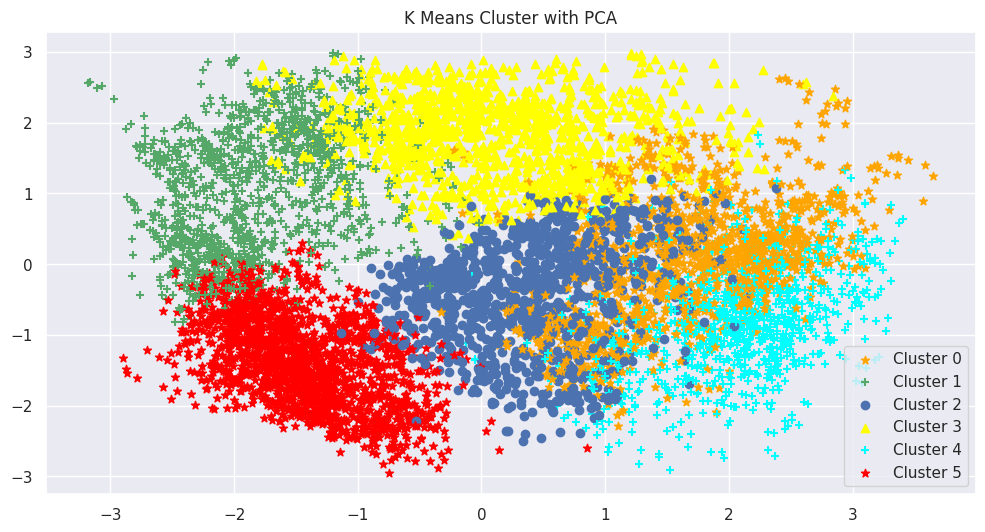

In [29]:
plt.figure(figsize=(12,6))
for i in range(0,pca.shape[0]):
  if kmeans.labels_[i]==0:
    c1=plt.scatter(pca[i,0],pca[i,1],c="orange",marker="*")
  elif kmeans.labels_[i]==1:
    c2=plt.scatter(pca[i,0],pca[i,1],c="g",marker="+")
  elif kmeans.labels_[i]==2:
    c3=plt.scatter(pca[i,0],pca[i,1],c="b",marker="o")
  elif kmeans.labels_[i]==3:
    c4=plt.scatter(pca[i,0],pca[i,1],c="yellow",marker="^")
  elif kmeans.labels_[i]==4:
    c5=plt.scatter(pca[i,0],pca[i,1],c="cyan",marker="+")
  elif kmeans.labels_[i]==5:
    c6=plt.scatter(pca[i,0],pca[i,1],c="red",marker="*")

plt.legend([c1,c2,c3,c4,c5,c6],['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.title("K Means Cluster with PCA")
plt.show()